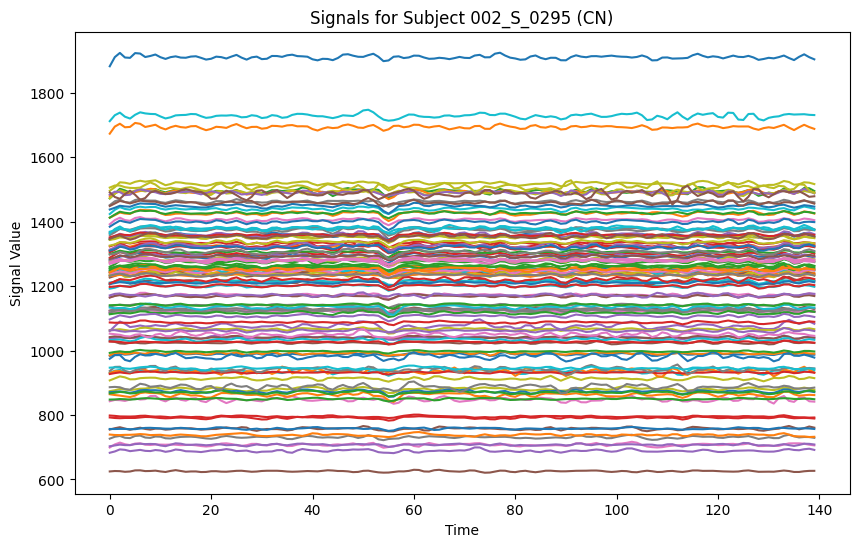

Subject 002_S_0295 (CN) signals shape: (140, 116)


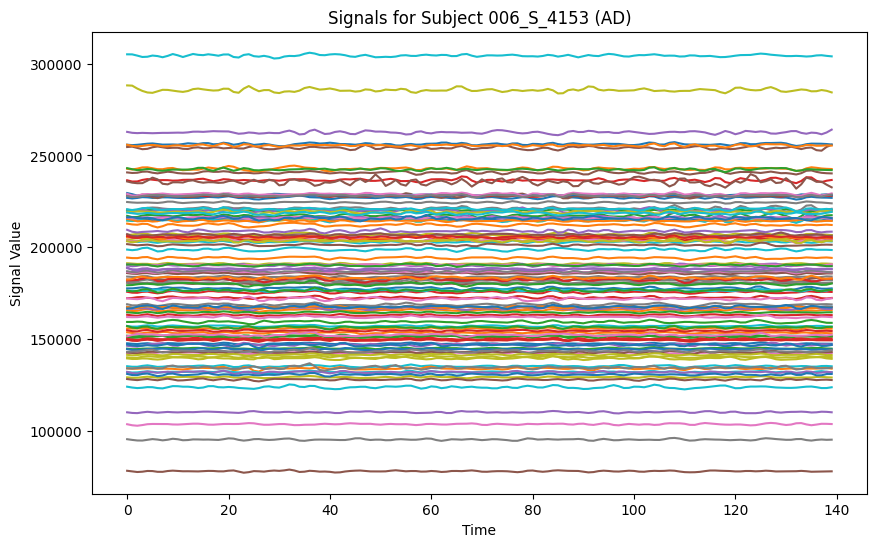

Subject 006_S_4153 (AD) signals shape: (140, 116)


In [13]:
import os
import glob
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 1. Set paths
# ---------------------------------------------------------------------------
database_subjects_path = '/content/drive/MyDrive/UNSAM_rocket/DataBaseSubjects.csv'
roisignals_path = '/content/drive/MyDrive/UNSAM_rocket/ROISignals'  # Folder containing ROISignals_*.mat

# ---------------------------------------------------------------------------
# 2. Load and filter the CSV
# ---------------------------------------------------------------------------
df_subjects = pd.read_csv(database_subjects_path)
df_filtered = df_subjects[
    (df_subjects['ResearchGroup'] == 'CN') |
    (df_subjects['ResearchGroup'] == 'AD')
]

# ---------------------------------------------------------------------------
# 3. For CN and AD, find the first subject with shape (140,116)
# ---------------------------------------------------------------------------
first_subjects = {}  # will store { 'CN': {...}, 'AD': {...} }

for _, row in df_filtered.iterrows():
    subject_id = row['SubjectID']
    research_group = row['ResearchGroup']

    mat_file_path = os.path.join(roisignals_path, f'ROISignals_{subject_id}.mat')

    if os.path.exists(mat_file_path):
        mat_data = sio.loadmat(mat_file_path)
        if 'ROISignals' in mat_data:
            signals = mat_data['ROISignals']

            # Only keep those with shape (140, 116)
            if signals.shape == (140, 116):
                # Store only the first subject encountered for each group
                if research_group not in first_subjects:
                    first_subjects[research_group] = {
                        'signals': signals,
                        'subject_id': subject_id
                    }

    # If we already have both groups, we can stop early
    if len(first_subjects) == 2:
        break

# ---------------------------------------------------------------------------
# 4. Plot signals for the first subject in each group, print shape
# ---------------------------------------------------------------------------
for group, info in first_subjects.items():
    subj_id = info['subject_id']
    signals = info['signals']

    # Plot the signals (rows = timepoints, columns = ROIs)
    plt.figure(figsize=(10, 6))
    plt.plot(signals)
    plt.title(f"Signals for Subject {subj_id} ({group})")
    plt.xlabel("Time")
    plt.ylabel("Signal Value")
    plt.show()

    print(f"Subject {subj_id} ({group}) signals shape: {signals.shape}")


In [8]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# prompt: import all the .mat files that are in the ROISignals folder please

import scipy.io as sio
import os
import glob

# Assuming ROISignals folder is in your Google Drive
roisignals_path = '/content/drive/MyDrive/UNSAM_rocket/ROISignals'  # Update this path

# Get a list of all .mat files in the folder
mat_files = glob.glob(os.path.join(roisignals_path, '*.mat'))

# Import each .mat file
for mat_file in mat_files:
  try:
    mat_data = sio.loadmat(mat_file)
    # Now you have the data from the .mat file in mat_data
    print(f"Imported data from: {mat_file}")
    # You can access specific variables within mat_data like mat_data['variable_name']
  except Exception as e:
    print(f"Error importing {mat_file}: {e}")


Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_4150.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_019_S_4367.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_027_S_2219.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_002_S_4219.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_6672.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_018_S_5240.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_4192.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_013_S_4731.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_027_S_6648.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_019_S_6712.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


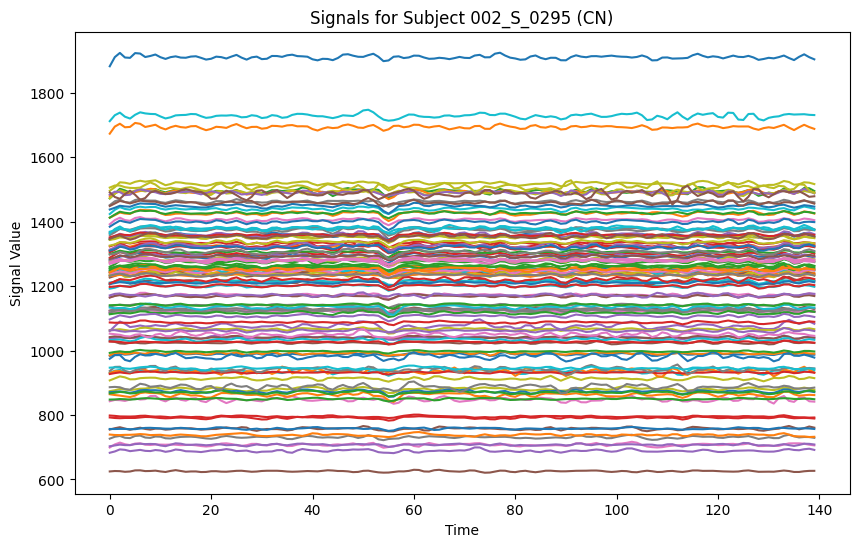

Shape of the signals for Subject 002_S_0295 (CN): (140, 116)


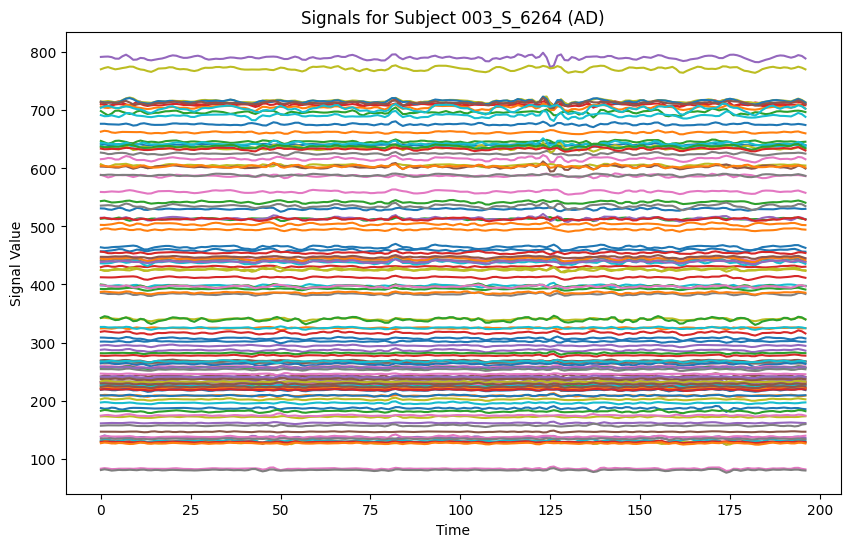

Shape of the signals for Subject 003_S_6264 (AD): (197, 116)


In [10]:
# prompt: there is a column named SubjectID in DataBaseSubjects.csv that contains the ID of each patient. We can use it to read the data /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_ + "SubjectID". There is another column called ResearchGroup that contains CN, AD , MCI, EMCI and LMCI. Please only keep the CN and AD subjects please. Plot the signals and the shape of the first subject of each class (CN and AD).

from google.colab import drive
import scipy.io as sio
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Path to your DataBaseSubjects.csv file
database_subjects_path = '/content/drive/MyDrive/UNSAM_rocket/DataBaseSubjects.csv'  # Update this path

# Load the DataBaseSubjects.csv file into a pandas DataFrame
try:
    df_subjects = pd.read_csv(database_subjects_path)
except Exception as e:
    print(f"Error reading DataBaseSubjects.csv: {e}")

# Filter the DataFrame to only include CN and AD subjects
df_filtered = df_subjects[(df_subjects['ResearchGroup'] == 'CN') | (df_subjects['ResearchGroup'] == 'AD')]

# Assuming ROISignals folder is in your Google Drive
roisignals_path = '/content/drive/MyDrive/UNSAM_rocket/ROISignals'  # Update this path

# Create dictionaries to store the first subject of each class
first_subjects = {}

# Iterate through the filtered subjects
for index, row in df_filtered.iterrows():
    subject_id = row['SubjectID']
    research_group = row['ResearchGroup']

    mat_file_path = os.path.join(roisignals_path, f'ROISignals_{subject_id}.mat')

    if os.path.exists(mat_file_path):
        try:
            mat_data = sio.loadmat(mat_file_path)

            # Assuming your .mat file has a variable named 'ROISignals' or similar
            if 'ROISignals' in mat_data:
                signals = mat_data['ROISignals']

                # Store the first subject of each class
                if research_group not in first_subjects:
                    first_subjects[research_group] = {'signals': signals, 'subject_id': subject_id}

        except Exception as e:
            print(f"Error importing {mat_file_path}: {e}")


# Plot the signals and shape of the first subject of each class
for research_group, subject_data in first_subjects.items():
    signals = subject_data['signals']
    subject_id = subject_data['subject_id']

    plt.figure(figsize=(10, 6))
    plt.plot(signals)
    plt.title(f"Signals for Subject {subject_id} ({research_group})")
    plt.xlabel("Time")
    plt.ylabel("Signal Value")
    plt.show()

    print(f"Shape of the signals for Subject {subject_id} ({research_group}): {signals.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_4150.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_019_S_4367.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_027_S_2219.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_002_S_4219.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_6672.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_018_S_5240.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_006_S_4192.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_013_S_4731.mat
Imported data from: /content/drive/MyDrive/UNSAM_rocket/ROISignals/ROISignals_027_S_6648.mat
Imported data from: /content/drive

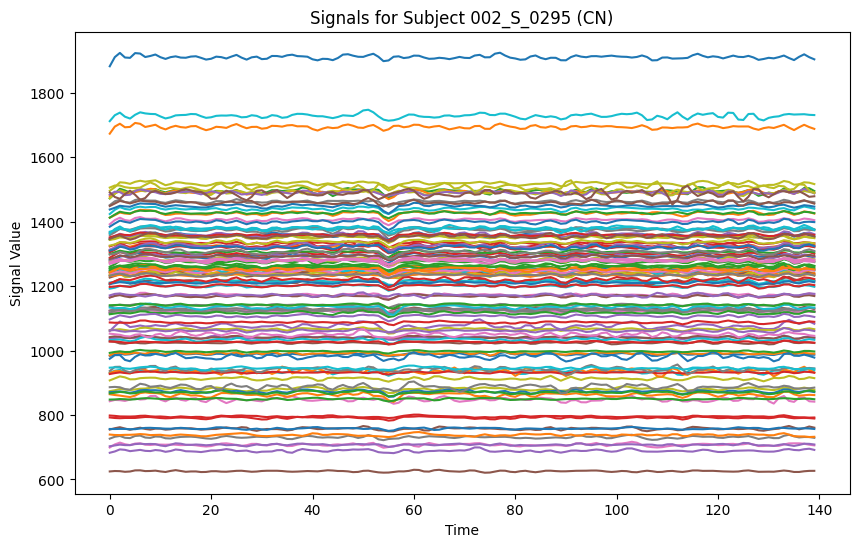

Shape of the signals for Subject 002_S_0295 (CN): (140, 116)


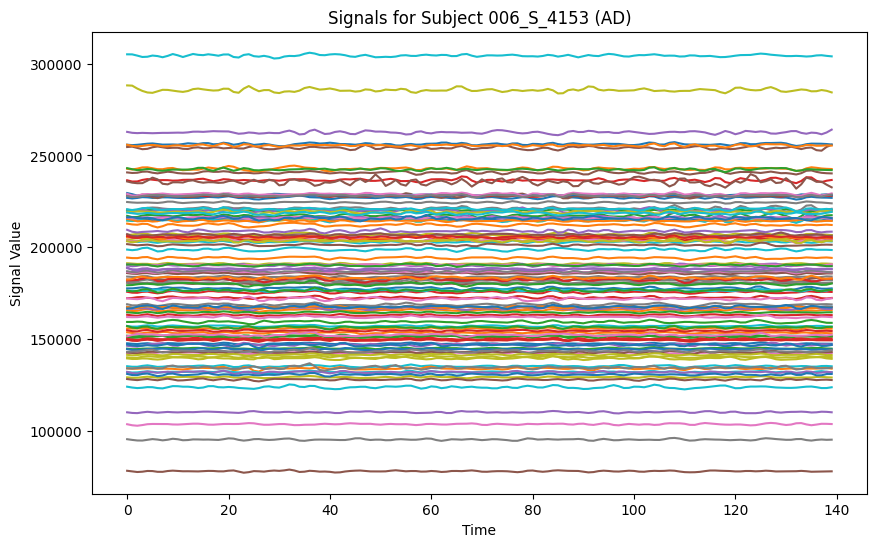

Shape of the signals for Subject 006_S_4153 (AD): (140, 116)


In [12]:
# prompt: please just keep the shape (140,116) of each subject

from google.colab import drive
import scipy.io as sio
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')


# Assuming ROISignals folder is in your Google Drive
roisignals_path = '/content/drive/MyDrive/UNSAM_rocket/ROISignals'  # Update this path

# Get a list of all .mat files in the folder
mat_files = glob.glob(os.path.join(roisignals_path, '*.mat'))

# Import each .mat file
for mat_file in mat_files:
  try:
    mat_data = sio.loadmat(mat_file)
    # Now you have the data from the .mat file in mat_data
    print(f"Imported data from: {mat_file}")
    # You can access specific variables within mat_data like mat_data['variable_name']
  except Exception as e:
    print(f"Error importing {mat_file}: {e}")



drive.mount('/content/drive')

# Path to your DataBaseSubjects.csv file
database_subjects_path = '/content/drive/MyDrive/UNSAM_rocket/DataBaseSubjects.csv'  # Update this path

# Load the DataBaseSubjects.csv file into a pandas DataFrame
try:
    df_subjects = pd.read_csv(database_subjects_path)
except Exception as e:
    print(f"Error reading DataBaseSubjects.csv: {e}")

# Filter the DataFrame to only include CN and AD subjects
df_filtered = df_subjects[(df_subjects['ResearchGroup'] == 'CN') | (df_subjects['ResearchGroup'] == 'AD')]

# Assuming ROISignals folder is in your Google Drive
roisignals_path = '/content/drive/MyDrive/UNSAM_rocket/ROISignals'  # Update this path

# Create dictionaries to store the first subject of each class
first_subjects = {}

# Iterate through the filtered subjects
for index, row in df_filtered.iterrows():
    subject_id = row['SubjectID']
    research_group = row['ResearchGroup']

    mat_file_path = os.path.join(roisignals_path, f'ROISignals_{subject_id}.mat')

    if os.path.exists(mat_file_path):
        try:
            mat_data = sio.loadmat(mat_file_path)

            # Assuming your .mat file has a variable named 'ROISignals' or similar
            if 'ROISignals' in mat_data:
                signals = mat_data['ROISignals']

                # Keep only the shape (140, 116)
                if signals.shape == (140, 116):
                    # Store the subject data
                    if research_group not in first_subjects:
                        first_subjects[research_group] = {'signals': signals, 'subject_id': subject_id}


        except Exception as e:
            print(f"Error importing {mat_file_path}: {e}")


# Plot the signals and shape of the first subject of each class
for research_group, subject_data in first_subjects.items():
    signals = subject_data['signals']
    subject_id = subject_data['subject_id']

    plt.figure(figsize=(10, 6))
    plt.plot(signals)
    plt.title(f"Signals for Subject {subject_id} ({research_group})")
    plt.xlabel("Time")
    plt.ylabel("Signal Value")
    plt.show()

    print(f"Shape of the signals for Subject {subject_id} ({research_group}): {signals.shape}")


In [ ]:
import os
import pandas as pd

# Set your local project directory
project_dir = '/home/santiago/Desktop/azheimer/'
os.chdir(project_dir)

# Load the CSV file
csv_path = os.path.join(project_dir, 'DataBaseSubjects.csv')
subjects_df = pd.read_csv(csv_path)

# Verify the contents of the directory (optional)
print(os.listdir(project_dir))

# Verify the contents of the directory
!ls

['VAE_pearson.ipynb', 'ROISignals', 'tensor_processing.log', '3D_matrix', 'new.ipynb', 'DataBaseSubjects.csv', 'gpt.ipynb']
3D_matrix	      gpt.ipynb  ROISignals		VAE_pearson.ipynb
DataBaseSubjects.csv  new.ipynb  tensor_processing.log


In [ ]:
import os
import torch
import numpy as np
import scipy.io as sio
from scipy.stats import zscore
from sklearn.metrics import mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm  # Progress bar
import logging

# Setup logging for error handling
logging.basicConfig(filename='tensor_processing.log', level=logging.ERROR)

# Function to discretize continuous signals into a fixed number of bins
def discretize_signals(signals, num_bins=10):
    discretized_signals = np.zeros_like(signals)
    for i in range(signals.shape[1]):  # Loop over each ROI (column)
        discretized_signals[:, i] = np.digitize(signals[:, i], bins=np.histogram_bin_edges(signals[:, i], bins=num_bins))
    return discretized_signals

# Function to compute mutual information matrix for discretized signals
def compute_mutual_information_matrix(signals, num_bins=10):
    discretized_signals = discretize_signals(signals, num_bins)
    num_rois = discretized_signals.shape[1]
    mi_matrix = np.zeros((num_rois, num_rois))

    for i in range(num_rois):
        for j in range(num_rois):
            mi_matrix[i, j] = mutual_info_score(discretized_signals[:, i], discretized_signals[:, j])
    return mi_matrix

# Granger causality function with error handling and logging
def granger_for_pair(args):
    signals, i, j, max_lag = args
    if i != j:
        try:
            test_result = grangercausalitytests(signals[:, [i, j]], max_lag, verbose=False)
            p_value = test_result[max_lag][0]['ssr_ftest'][1]
            return i, j, -np.log(p_value) if p_value > 0 else 0
        except Exception as e:
            logging.error(f"Error computing Granger causality for pair {i}, {j}: {e}")
            return i, j, 0
    return i, j, 0

# Function to compute Granger causality matrix in parallel
def compute_granger_causality_matrix_parallel(signals, max_lag=1, num_workers=4):
    num_rois = signals.shape[1]
    gc_matrix = np.zeros((num_rois, num_rois))

    # Prepare the arguments for parallel computation
    args = [(signals, i, j, max_lag) for i in range(num_rois) for j in range(num_rois)]

    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(granger_for_pair, arg) for arg in args]
        for future in as_completed(futures):
            i, j, value = future.result()
            gc_matrix[i, j] = value

    return gc_matrix

# Function to compute the Pearson correlation matrix after z-score normalization
def compute_correlation_matrix(signals):
    # Normalize the signals by channels (rows) using z-score
    zscored_signals = zscore(signals, axis=0)
    # Compute the Pearson correlation matrix
    return np.corrcoef(zscored_signals, rowvar=False)  # rowvar=False to correlate columns

# Function to combine the matrices into a 3D tensor
def combine_matrices_to_tensor(corr_matrix, mi_matrix, gc_matrix):
    combined_tensor = np.stack([corr_matrix, mi_matrix, gc_matrix], axis=0)  # Stack along a new axis (3, 116, 116)
    return combined_tensor

# Function to estimate memory usage of tensors
def estimate_memory_usage(num_subjects, matrix_shape=(3, 116, 116), dtype=torch.float32):
    bytes_per_element = torch.finfo(dtype).bits // 8
    total_elements = np.prod(matrix_shape) * num_subjects
    total_bytes = total_elements * bytes_per_element
    total_gb = total_bytes / (1024**3)  # Convert to GB
    return total_gb

# Parallel function to compute all three matrices for a subject and save tensors to disk incrementally
def process_and_save_subject_matrices(subject_id, signals, group, output_dir):
    corr_matrix = compute_correlation_matrix(signals)
    mi_matrix = compute_mutual_information_matrix(signals)
    gc_matrix = compute_granger_causality_matrix_parallel(signals)
    combined_tensor = combine_matrices_to_tensor(corr_matrix, mi_matrix, gc_matrix)

    # Save the tensor to a file instead of keeping everything in memory
    file_name = f'{group}_tensor_{subject_id}.pt'
    tensor_path = os.path.join(output_dir, file_name)
    torch.save(combined_tensor, tensor_path)

    return tensor_path

# Initialize dictionaries to store file paths for the 3D tensors
tensor_file_paths = {
    'AD': [],
    'CN': [],
    'Other': []
}

# Progress bar for tensor construction
output_dir = os.path.join(project_dir, 'TensorData')  # Directory for saving tensors
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

with tqdm(total=len(subjects_df), desc="Constructing tensors") as pbar:
    for subject_id in subjects_df['SubjectID']:
        file_path = os.path.join(project_dir, 'ROISignals', f"ROISignals_{subject_id}.mat")
        if os.path.exists(file_path):
            mat_data = sio.loadmat(file_path)
            research_group = subjects_df[subjects_df['SubjectID'] == subject_id]['ResearchGroup'].values[0]
            signals = mat_data['ROISignals'][:, :116]  # Extract the signals

            try:
                # Process matrices and save tensors incrementally
                tensor_path = process_and_save_subject_matrices(subject_id, signals, research_group, output_dir)

                # Store file paths in the appropriate group
                if research_group == 'AD':
                    tensor_file_paths['AD'].append(tensor_path)
                elif research_group == 'CN':
                    tensor_file_paths['CN'].append(tensor_path)
                else:
                    tensor_file_paths['Other'].append(tensor_path)

            except Exception as e:
                logging.error(f"Error processing subject {subject_id}: {e}")

        # Update progress
        pbar.update(1)

print("All 3D tensors have been computed, saved, and stored.")

# Estimate memory usage for a large batch
total_gb = estimate_memory_usage(len(subjects_df))
print(f"Estimated memory usage for all tensors: {total_gb:.2f} GB")


Constructing tensors:   0%|          | 0/352 [00:00<?, ?it/s]

/home/santiago/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/santiago/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/santiago/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/santiago/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
Constructing tensors:   0%|          | 1/352 [00:31<3:06:04, 31.81s/it]/home/santiago/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/santiago/.local/lib/pyt

All 3D tensors have been computed, saved, and stored.
Estimated memory usage for all tensors: 0.05 GB
